In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.use('tkagg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
marketing = pd.read_csv('Marketing Raw Data.csv')
marketing.head()

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,Monday,707,5211,651.375,No Promo
1,10/11/2020,Tuesday,1455,10386,1298.250,Promotion Red
2,11/11/2020,Wednesday,1520,12475,1559.375,Promotion Blue
3,12/11/2020,Thursday,1726,14414,1801.750,No Promo
4,13/11/2020,Friday,2134,20916,2614.500,No Promo


In [3]:
marketing.shape

(182, 6)

In [4]:
# Check for missing values

marketing.isna().sum()

Date               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

In [5]:
marketing.describe()

,Visitors,Revenue,Marketing Spend
count,182.000000,182.000000,182.000000
mean,1666.730769,12991.840659,1396.356564
std,503.528049,5883.117597,691.867416
min,488.000000,2898.000000,322.000000
25%,1339.000000,8808.500000,880.431250
50%,1546.000000,11547.500000,1223.900000
75%,2027.500000,15816.500000,1676.450000
max,4139.000000,36283.000000,4535.375000


In [6]:
marketing['Promo'].value_counts()

No Promo          74
Promotion Red     54
Promotion Blue    54
Name: Promo, dtype: int64

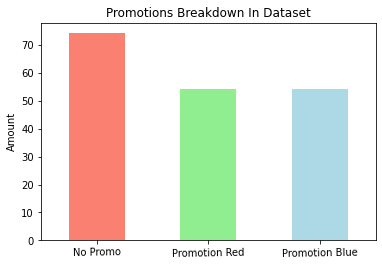

In [7]:
marketing['Promo'].value_counts().plot(kind='bar', color = ['salmon', 'lightgreen', 'lightblue'])
plt.xticks(rotation=1)
plt.ylabel('Amount')
plt.title('Promotions Breakdown In Dataset');

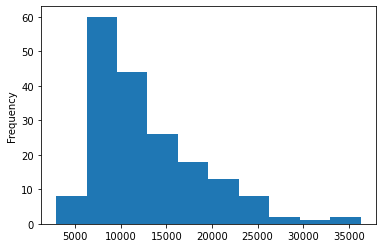

In [8]:
# Analyse the revenue distribution

marketing['Revenue'].plot.hist();

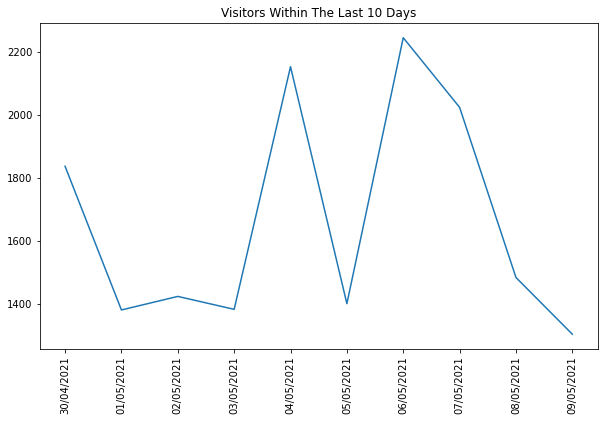

In [9]:
# Visualise the 'Visitors' column from the last 10 days in a line graph

plt.figure(figsize=(10,6))

a = marketing.tail(10).reset_index()

plt.plot(a['Visitors'])
plt.xticks(range(0,len(a['Visitors'])), a['Date'], rotation = 90) 
plt.title('Visitors Within The Last 10 Days')
plt.show()

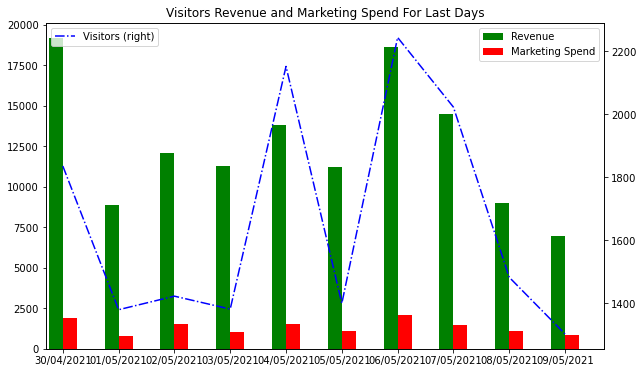

In [22]:

weight = .30

a[['Revenue', 'Marketing Spend']].plot(kind='bar', color=['green', 'red'], figsize=(10,6))
a['Visitors'].plot(color='blue', linestyle = '-.', secondary_y = True)

plt.title('Visitors Revenue and Marketing Spend For Last Days')
plt.xlabel('Dates')
plt.xticks(range(0,len(a['Visitors'])), a['Date'], rotation = 90) 
plt.legend(loc='upper left')
plt.xlim(-weight, len(a['Visitors'])-weight)
plt.show()

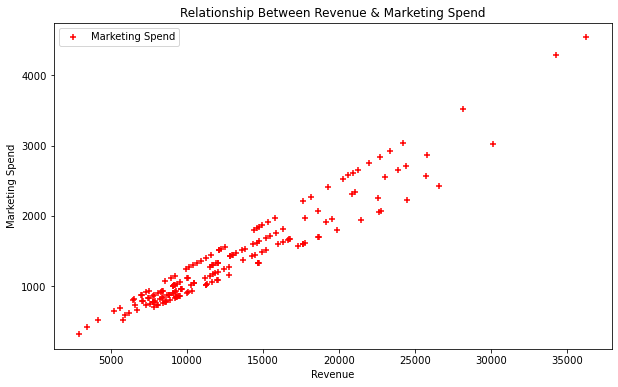

In [11]:
# Investigate the relationship between Revenue & Marketing Spend

plt.figure(figsize=(10,6))

plt.scatter(marketing['Revenue'], marketing['Marketing Spend'], color='Red', marker='+')
plt.xlabel('Revenue')
plt.ylabel('Marketing Spend')
plt.legend(['Marketing Spend'],loc='upper left')
plt.title('Relationship Between Revenue & Marketing Spend');

#The visual shows, the more increase in marketing spend, the higher the revenue.

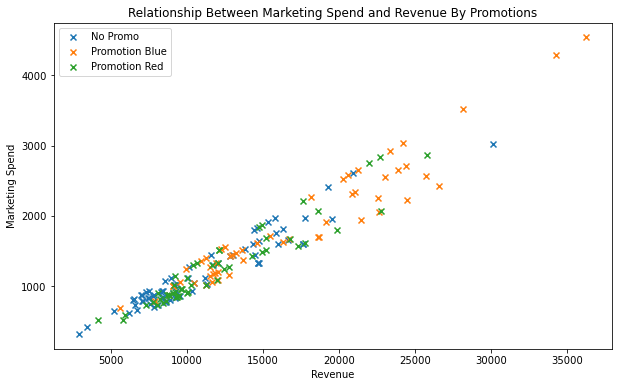

In [12]:
# Plot the different promotions per Revenue and Marketing Spend

groups = marketing[['Promo','Revenue', 'Marketing Spend']].groupby('Promo')

fig, ax = plt.subplots(figsize=(10,6))   # Create an empty figure
    
for promo, x in groups:
    ax.scatter(x['Revenue'], x['Marketing Spend'], marker = 'x', label=promo)
    
plt.title('Relationship Between Marketing Spend and Revenue By Promotions')
plt.xlabel('Revenue')
plt.ylabel('Marketing Spend')

ax.legend()
plt.show()

# Visual shows that 'Promotion Blue' generate a higher revenue when it comes to marketing spend

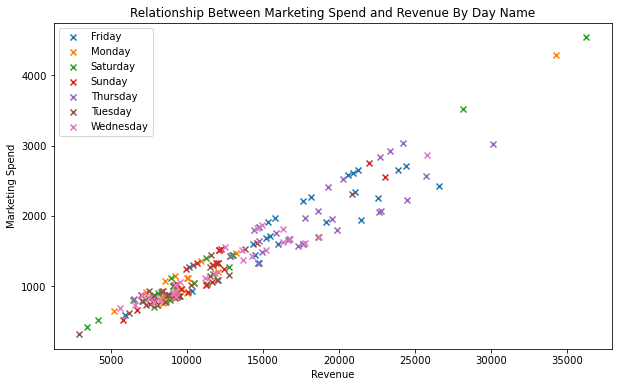

In [13]:
# # Plot the Revenue and Marketing Spend by Days

groups = marketing[['Day_Name','Revenue', 'Marketing Spend']].groupby('Day_Name')

fig, ax = plt.subplots(figsize=(10,6))   # Create an empty figure
    
for promo, x in groups:
    ax.scatter(x['Revenue'], x['Marketing Spend'], marker = 'x', label=promo)
    
plt.title('Relationship Between Marketing Spend and Revenue By Day Name')
plt.xlabel('Revenue')
plt.ylabel('Marketing Spend')

ax.legend()
plt.show()


Text(0.5, 1.0, 'Visitors & Marketing Spend Per Promotion')

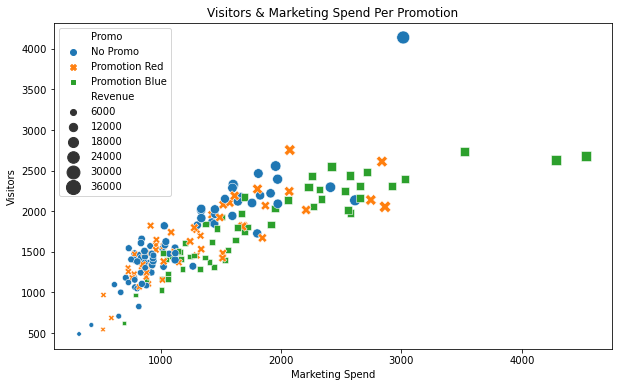

In [14]:
# Create a scatterplot using the revenue as size of bubble

plt.figure(figsize=(10,6)) 

ax = sns.scatterplot(x = 'Marketing Spend', y='Visitors', data = marketing, 
                     hue = 'Promo', 
                     style = 'Promo', 
                     size='Revenue', 
                     sizes=(20,200))

ax.legend(loc='upper left', fontsize=10)
ax.set_title('Visitors & Marketing Spend Per Promotion')

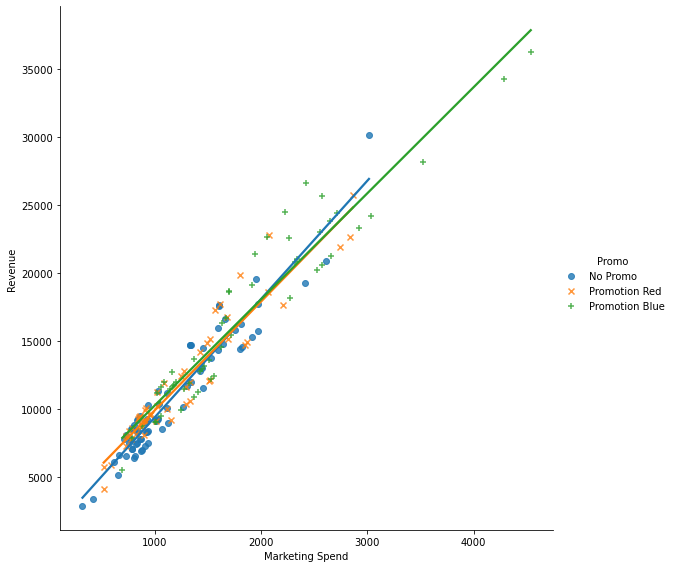

In [15]:
# Analyse the linear regression (for prediction) between Marketing Spend and Revenue

ax = sns.lmplot(x = 'Marketing Spend', y='Revenue', data = marketing, height = 8, 
                hue = 'Promo', 
                markers = ['o', 'x', '+'],
                ci = None)  

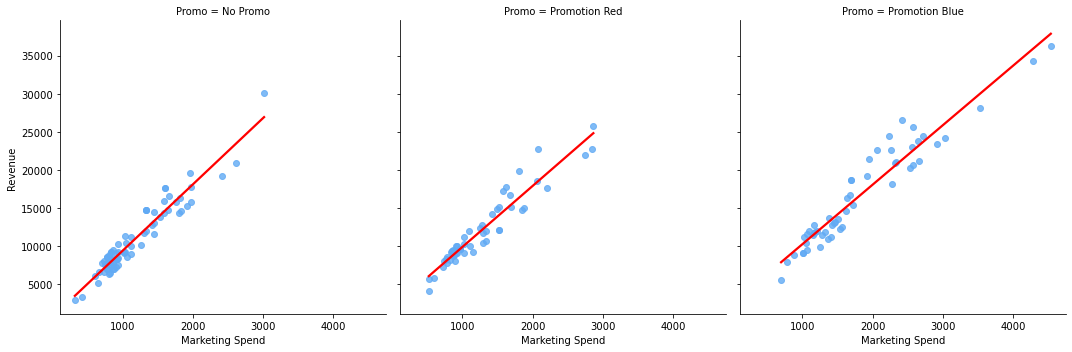

In [16]:
# Seperately analyse the linear regression for Revenue & Marketing Spend based on the different promotions

ax = sns.lmplot(x = 'Marketing Spend', y='Revenue', data = marketing, height = 5, 
                col = 'Promo', 
                ci = None,
                line_kws = {'color': 'red'},
                scatter_kws = {'color': '#61AAF4'})  

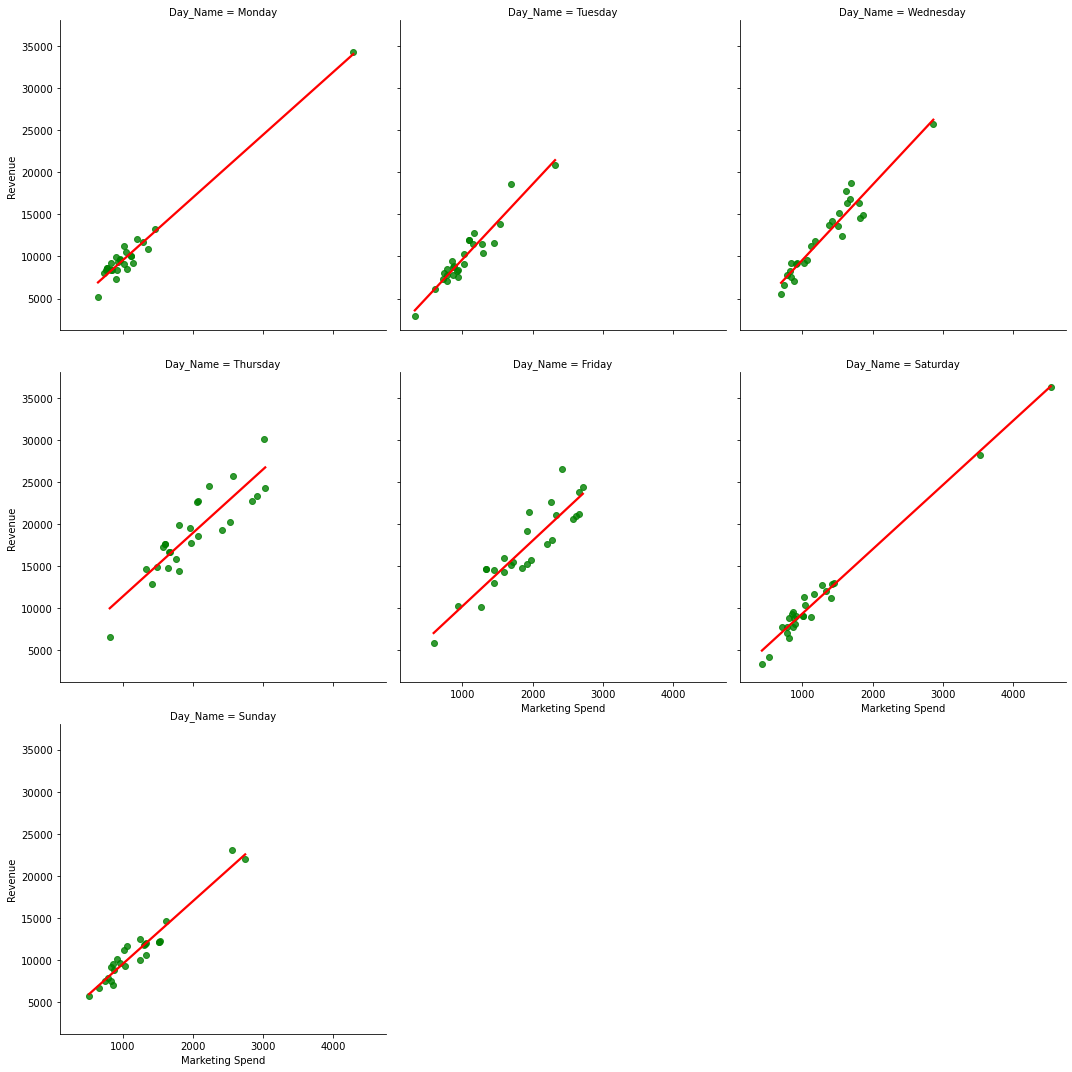

In [31]:
# Separately analyse the linear regression for Revenue & Marketing Spend based on the days

ax = sns.lmplot(x = 'Marketing Spend', y='Revenue', data = marketing, height = 5, 
                col = 'Day_Name', 
                ci = None,
                line_kws = {'color': 'red'},
                scatter_kws = {'color': 'green'},
                col_wrap = 3 ) 

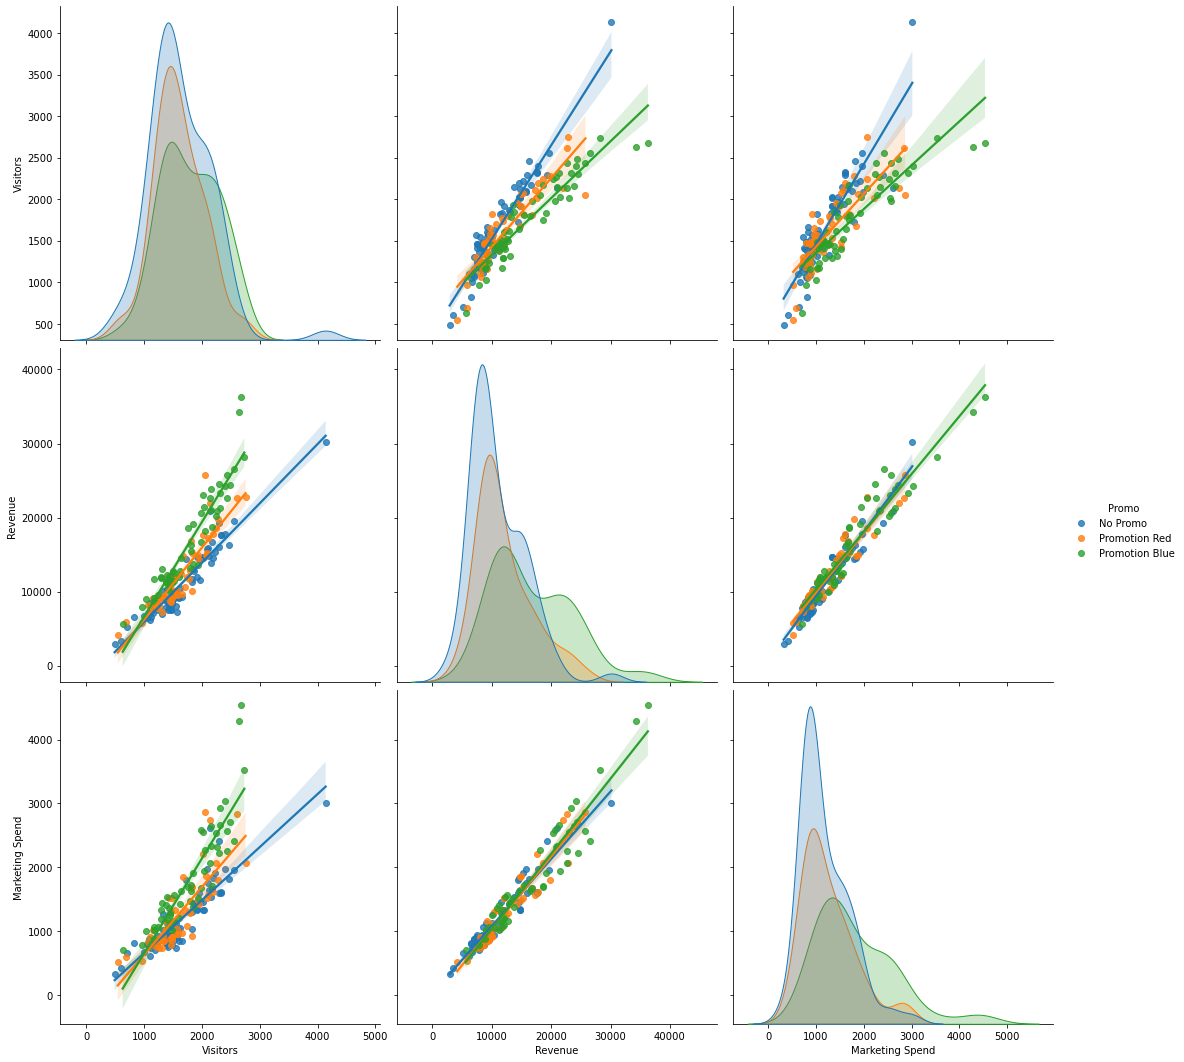

In [18]:
# Create a pairplot to view the relationships between numeric columns, Revenue, Marketing Spend and Visitors per promotion

g = sns.pairplot(marketing[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']],  
                 height=5, 
                 hue = 'Promo', kind = 'reg')

In [23]:
# Analyse the correlation between numeric columns Revenue, Marketing Spend and Visitors

corr_matrix = marketing[['Visitors', 'Revenue', 'Marketing Spend']].corr()
corr_matrix

# There is a strong positive correlation between Revenue and Marketing Spend meaning that both variables increase together



,Visitors,Revenue,Marketing Spend
Visitors,1.000000,0.879925,0.824810
Revenue,0.879925,1.000000,0.963762
Marketing Spend,0.824810,0.963762,1.000000


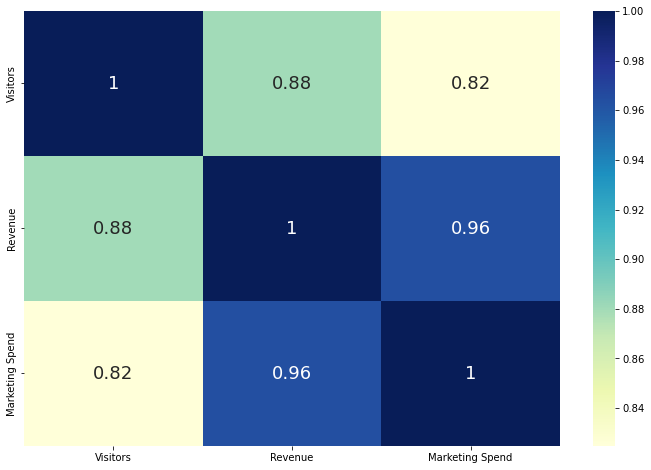

In [20]:
# View the correlation matrix in a heatmap

figure = plt.figure(figsize=(12,8))

heatmap = sns.heatmap(corr_matrix,
                      annot=True,
                      annot_kws = {'size':18},
                      cmap = 'YlGnBu')
                     

In [29]:
# Amalyse the correlation of hte different features.

corr_pairs = corr_matrix.unstack()
corr_pairs

Visitors         Visitors           1.000000
                 Revenue            0.879925
                 Marketing Spend    0.824810
Revenue          Visitors           0.879925
                 Revenue            1.000000
                 Marketing Spend    0.963762
Marketing Spend  Visitors           0.824810
                 Revenue            0.963762
                 Marketing Spend    1.000000
dtype: float64

In [30]:
# Analyse a part of the dataset where the Revenue & Marketing Spend are above average.

high_rev_and_mark_spend = marketing[(marketing['Revenue'] > 12992) & (marketing['Marketing Spend'] > 1396)]
high_rev_and_mark_spend

,Date,Day_Name,Visitors,Revenue,Marketing Spend,Promo
3,12/11/2020,Thursday,1726,14414,1801.750000,No Promo
4,13/11/2020,Friday,2134,20916,2614.500000,No Promo
5,14/11/2020,Saturday,1316,12996,1444.000000,Promotion Blue
10,19/11/2020,Thursday,2321,17660,1605.454545,No Promo
11,20/11/2020,Friday,1819,15188,1687.555556,Promotion Red
...,...,...,...,...,...,...
171,29/04/2021,Thursday,2139,22655,2059.545455,Promotion Blue
172,30/04/2021,Friday,1836,19167,1916.700000,Promotion Blue
176,04/05/2021,Tuesday,2152,13805,1533.888889,No Promo
178,06/05/2021,Thursday,2244,18611,2067.888889,Promotion Red


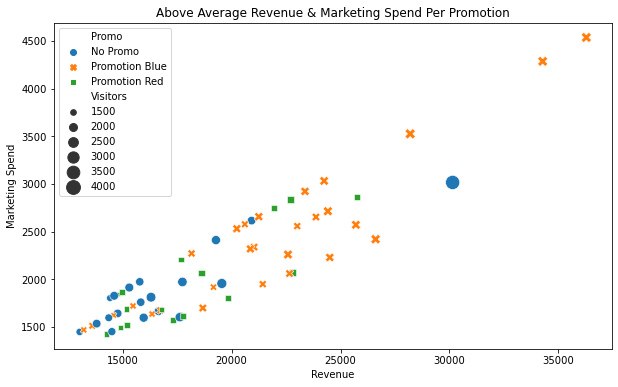

In [27]:
# Visualise the above average Revenue & Marketing Spend based on Promotions & Visitors

plt.figure(figsize=(10,6)) 

ax = sns.scatterplot(x = 'Revenue', y='Marketing Spend', data = high_rev_and_mark_spend, 
                     hue = 'Promo', 
                     style = 'Promo', 
                     size='Visitors', 
                     sizes=(20,200))

ax.legend(loc='upper left', fontsize=10)
ax.set_title('Above Average Revenue & Marketing Spend Per Promotion');